## Import the  libraries for the project

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load the dataset

In [55]:
data=pd.read_csv("Heart_Disease_Prediction.csv")
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [56]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Get the information and describe the dataset

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [58]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## Check whether the  missing values

In [59]:
missing_values=data.isnull().sum()
missing_values

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

## Data cleaning and preprocessng here
             Data preprocessing for changing categorical value into binary format.
             Here, Used OrdinalEncoder method for sklearn preprocessing library.

In [60]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Heart Disease'],return_df=True,mapping=[{'col':'Heart Disease','mapping':{'Presence':1,'Absence':0}}])
data['Heart Disease']=encoder.fit_transform(data['Heart Disease'])
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## Data Visualization


## Correlation analysis

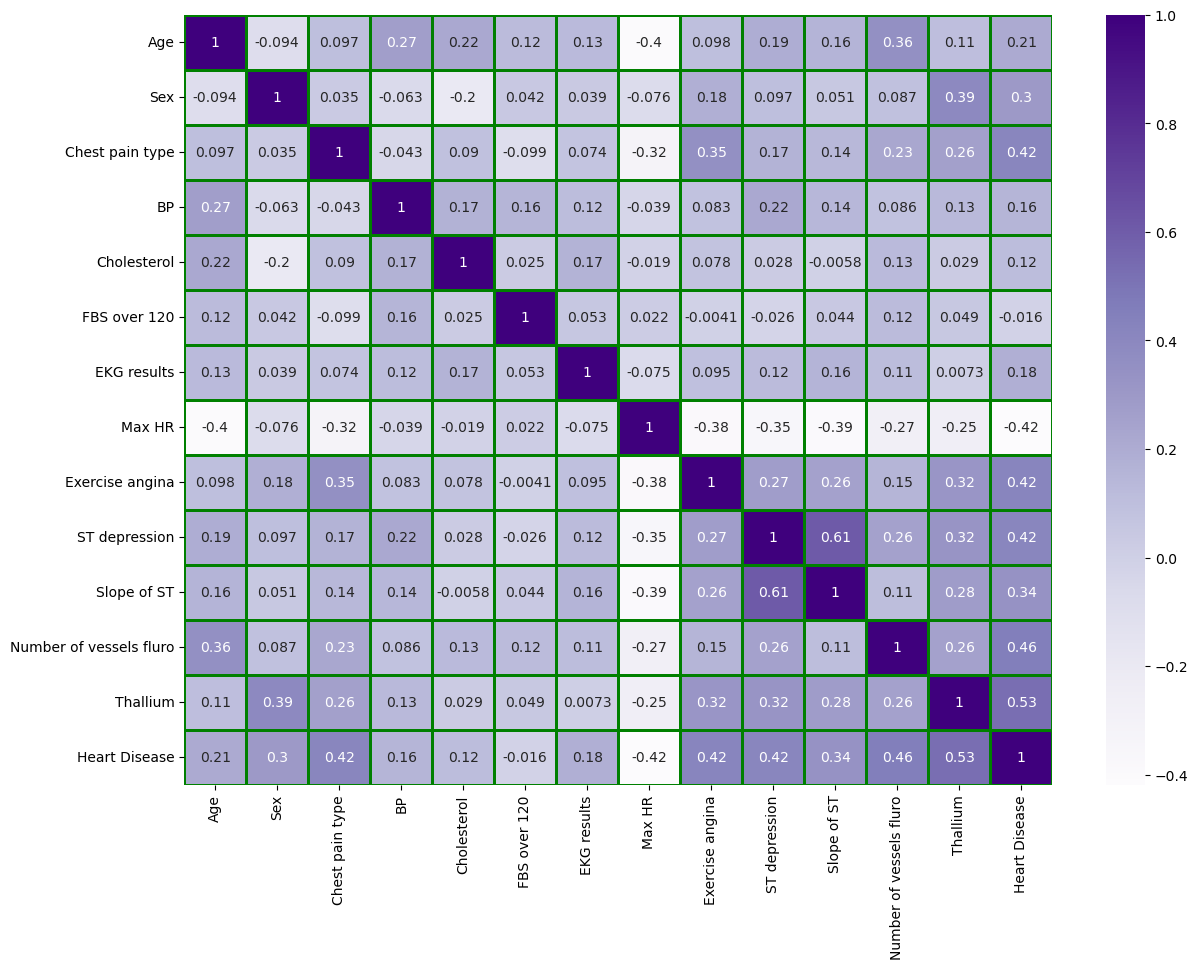

In [61]:
plt.figure(figsize = (14, 10)) 
sns.heatmap(data.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=1.0)
plt.show()


## Countplot of people based on their sex and whether they are attacked by Heart Disease or not

D:\Anaconda\Conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


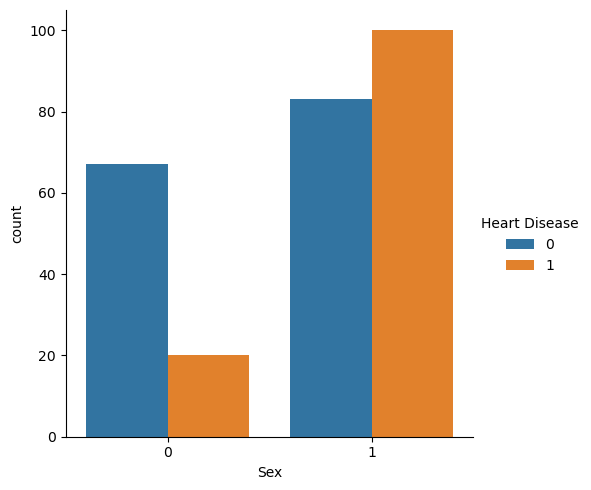

In [62]:
sns.catplot(data=data, kind='count', x='Sex',hue='Heart Disease')
plt.show()

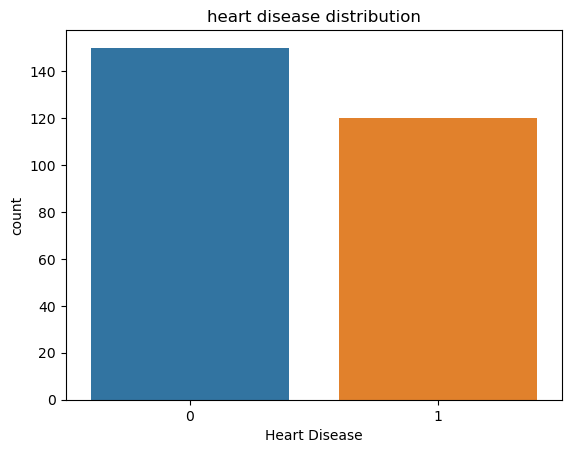

In [63]:
sns.countplot(x='Heart Disease',data=data)
plt.title("heart disease distribution")
plt.show()


## Split the data into features (x) and target(y)

In [12]:
X=data.drop('Heart Disease',axis=1)
y=data['Heart Disease']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Import LogisticRegression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model=LogisticRegression(max_iter=1000)

In [66]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Predicted values for Heart_Disease

In [67]:
predicted=model.predict(X_test)
print(predicted)

[1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1]


## Importing library from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

## Accuracy of model

In [69]:
accuracy=accuracy_score(predicted,y_test)
print("The accuracy of model is:",accuracy)

The accuracy of model is: 0.9259259259259259


## Classification report

In [70]:
target_names=['class 0','class 1']
classification=classification_report(predicted,y_test)
print(classification)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.86      0.95      0.90        19

    accuracy                           0.93        54
   macro avg       0.91      0.93      0.92        54
weighted avg       0.93      0.93      0.93        54



## Confusion matries

In [71]:
confusion=confusion_matrix(predicted,y_test)
print(confusion)

[[32  3]
 [ 1 18]]


## Analyze the models coefficients to understand the importance the different features

In [72]:
coefficients=model.coef_[0]

In [73]:
feature_names=X.columns

In [74]:
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})


In [75]:
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)


In [76]:
print(coefficients_df)

                    Feature  Coefficient  Abs_Coefficient
1                       Sex     1.038439         1.038439
11  Number of vessels fluro     0.840987         0.840987
5              FBS over 120    -0.670132         0.670132
8           Exercise angina     0.667317         0.667317
2           Chest pain type     0.642608         0.642608
9             ST depression     0.472146         0.472146
10              Slope of ST     0.443550         0.443550
12                 Thallium     0.329369         0.329369
6               EKG results     0.094255         0.094255
3                        BP     0.023190         0.023190
0                       Age    -0.014800         0.014800
7                    Max HR    -0.011772         0.011772
4               Cholesterol     0.004988         0.004988


## Confusion matrix display through graph

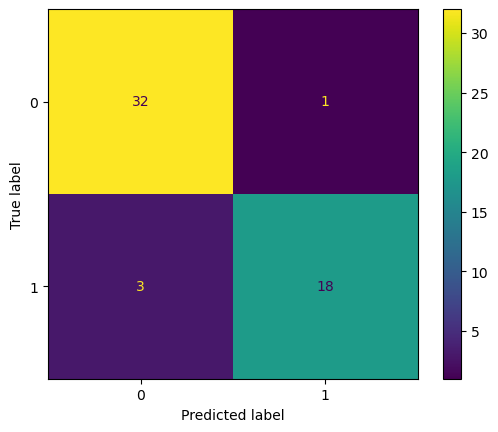

In [77]:
cm = confusion_matrix(y_test, predicted, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

 ## Completed the project